# <center> Stellar Classification and Analysis </center>



<center>
    <h2>Abstract</h2>
    This is an elementary analysis of Stellar objects provided by the Sloan Digital Sky Survey (SDSS) DR-17. The analysis here
    is related to multiclass classification, with the use of Decision Trees, K-Nearest Neighbors, and Ridge Regression Classifier. Common
    metrics such as Confusion Matrices, F$_1$ Scores, etc. were used to analyze.
</center>
<hr/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, 
                                     cross_val_score)
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [2]:
df = pd.read_csv("star_classification.csv")

<hr>

## Introduction to Stellar Objects

An important note about space, distance is measured in a space-time measurement known as a light-year. A light-year is the distance covered in a year using the speed of light (so a light-year is roughly 5.88 trillion miles) Thus, much of what we see in the night sky is really something from the past. Space is, by all accounts, studying the history of the universe.

This dataset is collection of Stellar Objects from the *Sloan Digital Sky Survey, DR17*. All of these objects fall into 3 classifications:
1. Galaxy
2. Quasar
3. Star

### Galaxy

<table>
    <tr>
        <th>Milky Way Galaxy</th>
        <th>Andromeda Galaxy</th>
    </tr>
    <tr>
        <td><img src="https://www.pixelstalk.net/wp-content/uploads/2016/08/Andromeda-Galaxy-Milky-Way.jpg" width=1000 /></td>
        <td><img src="https://imgs.search.brave.com/KnDF1FKu0_cxrpzRCYwOv9USNJMfUdeCCCZBMuVmBNw/rs:fit:1200:1200:1/g:ce/aHR0cDovL3d3dy5k/bC1kaWdpdGFsLmNv/bS9pbWFnZXMvQXN0/cm9ub215L0dhbGF4/aWVzL00zMS1TVE5G/MjAxNi1UT0FSZWQt/QmVzdDIxZnItUmVw/cm9jU3RhcnMuanBn" /></td>
    </tr>
    <tr>
        <td>(Sourced from Art, 2016)</td>
        <td>(Sourced from Locke, 2016)</td>
    </tr>
</table>

These bodies are characterized by their sheer size and brightness, as: 
<quote>
    A galaxy is any of the systems of stars and interstellar matter that make up the universe. Many such assemblages are so enormous that they contain hundreds of billions of stars. Galaxies usually exist in clusters, some of which measure hundreds of millions of light-years across.
    <cite>Hodge, P. W. (2022, March 28). galaxy. Encyclopedia Britannica. https://www.britannica.com/science/galaxy</cite>
</quote>

Galaxies have a unique relationship with another stellar body in this dataset: Quasars.

### Quasars

<quote>
    Quasar, an astronomical object of very high luminosity found in the centres of some galaxies and powered by gas spiraling at high velocity into an extremely large black hole. The brightest quasars can outshine all of the stars in the galaxies in which they reside, which makes them visible even at distances of billions of light-years. Quasars are among the most distant and luminous objects known.
    <cite>Peterson, B. (2019, June 15). quasar. Encyclopedia Britannica. https://www.britannica.com/science/quasar</cite>
</quote>

These objects are known to be closely connected to Galaxies, where they can appear at the center of the galaxy. The structure of a Quasar is quite unique. They result from gas being drawn into a supermassive black hole.

<quote>
    [G]as tumbles into the deep gravitational well of the black hole and is heated to incandescence as the gas particles pick up speed and pile up in a rapidly rotating “accretion disk” close to the horizon of the black hole.
    <cite>Peterson, B. (2019, June 15). quasar. Encyclopedia Britannica. https://www.britannica.com/science/quasar</cite>
</quote>


From this, the relationship between galaxies and quasars becomes clear. A quasar can exist in the center of a galaxy, if the supermassive black hole accretes at roughly 1% of the Eddington Rate. What this rate is, and how to calcuate it, is outside the scope of this notebook.

<center>
    <img src="https://cdn.britannica.com/63/21263-004-F9F98378/quasar-host-galaxies-Hubble-Space-Telescope.jpg?s=1500x700&q=85" />
    <br>
    <cite>Sourced from Encyclopedia Britannica</cite>
</center>
These quasars were captured by the Hubble Telescope. As seen in these images, Quasars are exceptionally bright.


### Stars
In comparison to our last two objects, stars are quite mundane. Stars come in all sizes and luninosity. Our sun, for example, is a prototypical sun - with average size and yellow light. However, a star like Alpha Centauri B emits blue light - and is classified as a Blue Dwarf. Stars have a lot of their own classification, but to classify them is outside the scope of this notebook. Suffice to say, stars are both common and incredibly unique.
<center>
    <img width=400 src="https://cdn.britannica.com/19/73319-050-065E4F9B/Sun-ultraviolet-light-satellite-Earth-Solar-and.jpg" />
    <br>
    <cite>Sourced from Encyclopedia Britannica</cite>
</center>


## Dataset Features

The dataset provided contains 17 Features, and 1 target.
- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


### `obj_ID`
This is simply the ID field of the data, we can safely ignore it as it doesn't have any bearing on the classification.

### `alpha` ($\alpha$)
Right Ascension is the hour placement of the celestial body, in relation to east-west (horizontal). The location is measured in time, rather than actual placement. The time used is J2000, which is "an exact point that is very close to noon, January 1, 2000 GMT, i.e., precisely Julian date 2451545.0 TT" (Epoch J2000.0, n.d.).

### `delta` ($\delta$)
Declination Angle then is the North-South (vertical) hour placement of the celestial body. It is also measured in the aformentioned J2000 epoch. 

Britannica, T. Editors of Encyclopaedia (2019, March 8). declination. Encyclopedia Britannica. https://www.britannica.com/science/declination

### `u`, `g`, `r`, `i`, `z`
All of these fall under the Photometric System. However, what this dataset does not note is the fact all of these are `u'`, `g'`,`r'`, `i'`,`z'`.


<quote>
    In astronomy, a photometric system is a set of well-defined passbands (or optical filters), with a known sensitivity to incident radiation. The sensitivity usually depends on the optical system, detectors and filters used. For each photometric system a set of primary standard stars is provided.
    <br>
    <cite>Photometric system. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Photometric_system&oldid=1081982703</cite>
    <br>
</quote>

As such, each as a specific wavelength it measures:
- `u'`: Ultraviolet light, with a wavelength of $\lambda_{eff} = 354nm$
- `g'`: Green light, this is visible light, with a $\lambda_{eff} = 475nm$
- `r'`: Red light, this is visible light, with a $\lambda_{eff} = 622nm$
- `i'`: Infrared light, this is just past the visible spectrum, with a $\lambda_{eff} = 763nm$
- `z'`: More infrared light, this is just past `i`'s range, with a $\lambda_{eff} = 905nm$




### `redshift`
Redshift is a physics concept, which measures the increase in wavelength, that is the movement of the object from `u` to `z`, and all letters between. Redshift has its inverse, Blueshift, but that's not available in this dataset.

### `MJD`
This is a simple modification, done via this formula:
$$MJD \equiv JD - 2,400,000.5$$
This date just adjusts the Julian Date, which is what is used in the J2000 Epoch.

## Data Exploration
### Naming Corrections

Given the review we've just had for the attributes, some of the columns will be renamed to better reflect their attributes.

In [3]:
df = df.rename(columns={
    "u": "u'",
    "g": "g'",
    "r": "r'",
    "i": "i'",
    "z": "z'"
})
df.head(5)

,obj_ID,alpha,delta,u',g',r',i',z',run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Visualization

The distribution of objects in dataset is somewhat skewed, as there's nearly double the amount of galaxies as there are quasars and stars. This decrepency leads to issues in the classification algorithms later on, and as such will be addressed in the Feature Extraction section.

Text(0.5, 6.79999999999999, 'Type of Object')

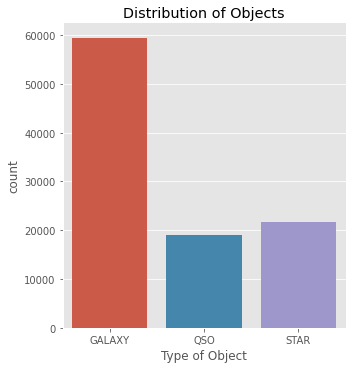

In [4]:
sns.catplot(x="class", kind="count", data=df)
plt.title("Distribution of Objects")
plt.xlabel("Type of Object")

In terms of other comparative graphs, redshift comes into play. redshift, as described above, measures the increase in wavelength frequency. What this means is that brighter objecst have higher redshift. This can be seen when we look at Quasars, which are known to be the brightest objects in the night sky.

Text(0.5, 1.0, 'Redshift per Class')

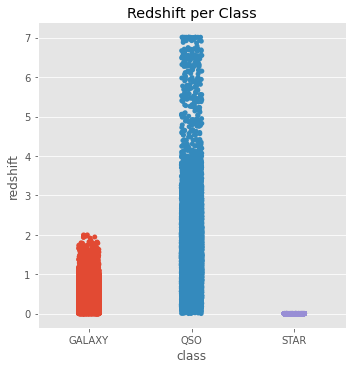

In [5]:
sns.catplot(x="class", y="redshift", data=df)
plt.title("Redshift per Class")

The last metric I wanted to display is something akin to the night sky. Using the $\alpha$ and $\delta$ we can plot all the objects where they were seen.

Text(0.5, 1.0, 'Location of Object in the Night Sky')

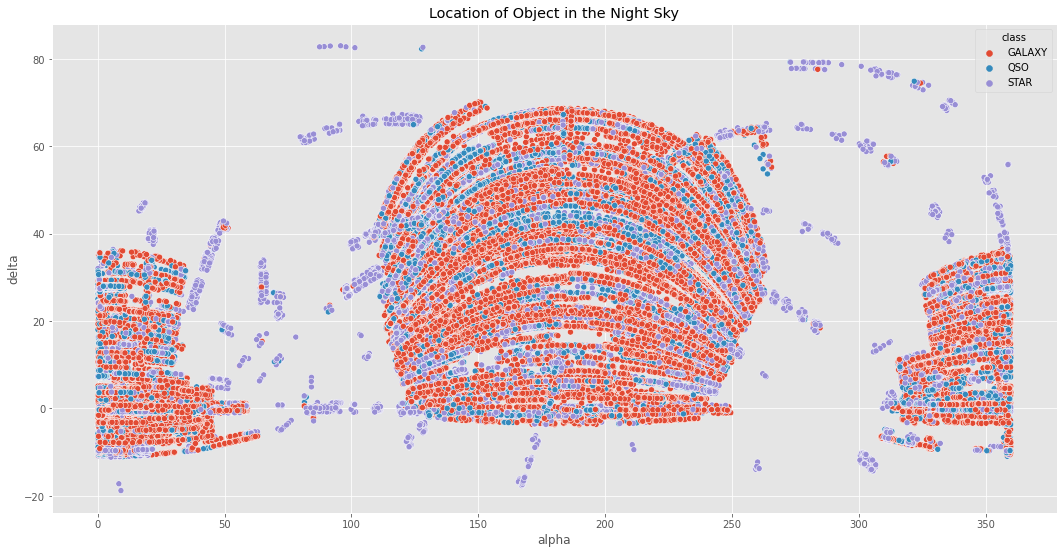

In [6]:
plt.figure(figsize=(18, 9))
sns.scatterplot(x="alpha", y="delta", hue="class", data=df)
plt.title("Location of Object in the Night Sky")

## Preprocessing
### Feature Removal

Although there aren't a ton of features, plenty of them are simply ID's, and don't carry any weight in classification. As such, those will be removed.

In [7]:
df = df.drop(columns=[
    "run_ID",
    "rerun_ID",
    "obj_ID",
    "cam_col",
    "field_ID",
    "plate",
    "fiber_ID",
    "spec_obj_ID"
])
df.head(5)

,alpha,delta,u',g',r',i',z',class,redshift,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187


### Feature Derivations

Second, I want to add blueshift to the dataset. Blueshift is calculated as just the negative redshift. This may not seem helpful, but this feature does help with classifying the data.

In [8]:
df["blueshift"] = df["redshift"].map(lambda r: -r)
df.head(5)

,alpha,delta,u',g',r',i',z',class,redshift,MJD,blueshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354,-0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158,-0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592,-0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039,-0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187,-0.116123


### Train-Test Split

In [9]:
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Classification


### Decision Tree/Random Forest


Decision Trees naturally handle multiclass cases, which make them ideal for this. The metrics are all numerical as well, meaning the calculations are easier as well. Lastly, Decision Tree/Random Forest models are some of the best in the Data Science Community.


#### Hyperparameter Tuning

I used Decision Trees for Hyperparameter tuning, as they work better in `GridSearchCV`, and Random Forest covers even more weaknesses of Decision Trees.

In [22]:
%%time

param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 4, 6],
    "max_features": ["sqrt", "log2", None]
}

dt_grid = (GridSearchCV(DecisionTreeClassifier(), 
                        param_grid, 
                        n_jobs=-1)
               .fit(X_train, 
                    y_train)
              )

print("Best Score")
print(dt_grid.best_score_)
print()
print("Best Params")
for name, val in dt_grid.best_params_.items():
    print(f"    {name} = {val}")
print()

Best Score
0.9657466666666666

Best Params
    criterion = gini
    max_features = None
    min_samples_split = 6

CPU times: user 1.54 s, sys: 57.8 ms, total: 1.6 s
Wall time: 10.2 s


#### Ideal Model

From this we can train a Random Forest with these parameters. Given the success of the Decision Tree, I can imagine high success.

In [23]:
%%time

random_forest_classifier = RandomForestClassifier(
    criterion="gini", 
    max_features=None, 
    min_samples_split=6,
    n_jobs=-1
)

random_forest_classifier.fit(X_train, y_train)
print()


CPU times: user 1min 27s, sys: 43.4 ms, total: 1min 27s
Wall time: 11.9 s


#### Evaluation

Now that we have a trained model, we can evaluate it. The metrics used will be a Confusion Matrix, and a Classification Report (F$_1$, Accuracy, Recall, Precision)

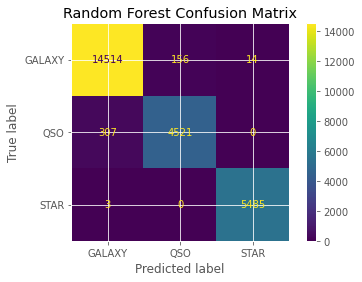

CPU times: user 439 ms, sys: 112 ms, total: 551 ms
Wall time: 194 ms


In [36]:
%%time

labels = ["GALAXY", "QSO", "STAR"]
y_pred = random_forest_classifier.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), 
    display_labels=labels
).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [37]:
%%time

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=labels))


Classification Report
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     14684
         QSO       0.97      0.94      0.95      4828
        STAR       1.00      1.00      1.00      5488

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000

CPU times: user 357 ms, sys: 3.05 ms, total: 360 ms
Wall time: 358 ms


In [35]:
%%time

print()
print("Cross Validation Score")
for idx, score in enumerate(cross_val_score(random_forest_classifier, X, y, n_jobs=-1), 1):
    print(f"        Split {idx} = {score}")


Cross Validation Score
        Split 1 = 0.97885
        Split 2 = 0.9789
        Split 3 = 0.97935
        Split 4 = 0.98005
        Split 5 = 0.97765
CPU times: user 108 ms, sys: 7.04 ms, total: 115 ms
Wall time: 1min 18s


### K Nearest Neighbors


This classifer isn't nearly as advanced as Decision Trees, nor as good, but it handles multiclass classification out of the box. This honestly made a huge difference. The dataset isn't that large either, meaning the scale issues are not as present.


#### Hyperparameter Tuning

In [14]:
%%time

param_grid = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan", "chebyshev"],
    "p": [2, 3, 4]
}

kn_grid = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    n_jobs=-1
).fit(X_train, y_train)

print("Best Score")
print(kn_grid.best_score_)
print()
print("Best Params")
for name, val in kn_grid.best_params_.items():
    print(f"    {name} = {val}")
print()

Best Score
0.8418666666666667

Best Params
    metric = manhattan
    n_neighbors = 3
    p = 2
    weights = distance

CPU times: user 5.31 s, sys: 484 ms, total: 5.79 s
Wall time: 1min 24s


#### Ideal Model

From here we can generate the ideal model. It's important to note that $p$ doesn't hold any bearing on the model, as the distance chosen is `manhattan`.

In [15]:
%%time

kneighbors_model = KNeighborsClassifier(
    metric="manhattan", 
    n_neighbors=3, 
    weights="distance"
)

kneighbors_model.fit(X_train, y_train)
print()


CPU times: user 177 ms, sys: 2 ms, total: 179 ms
Wall time: 178 ms


#### Evaluation

The same metrics as above will be used to evaluate as before.

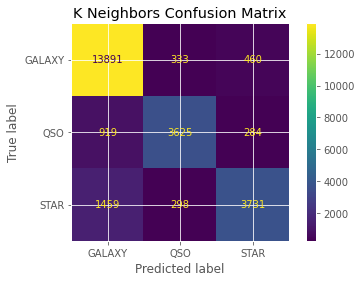

CPU times: user 337 ms, sys: 475 ms, total: 812 ms
Wall time: 281 ms


In [33]:
%%time

y_pred = kneighbors_model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), 
    display_labels=labels
).plot()
plt.title("K Neighbors Confusion Matrix")
plt.show()

In [34]:
%%time

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=labels))
print()


Classification Report
              precision    recall  f1-score   support

      GALAXY       0.85      0.95      0.90     14684
         QSO       0.85      0.75      0.80      4828
        STAR       0.83      0.68      0.75      5488

    accuracy                           0.85     25000
   macro avg       0.85      0.79      0.81     25000
weighted avg       0.85      0.85      0.85     25000


CPU times: user 382 ms, sys: 3.02 ms, total: 385 ms
Wall time: 384 ms


In [31]:
%%time

print("Cross Validation Score")
for idx, score in enumerate(cross_val_score(kneighbors_model, X, y, n_jobs=-1), 1):
    print(f"        Split {idx} = {score}")
print()

Cross Validation Score
        Split 1 = 0.81695
        Split 2 = 0.8235
        Split 3 = 0.83
        Split 4 = 0.81765
        Split 5 = 0.8159

CPU times: user 106 ms, sys: 7.88 ms, total: 114 ms
Wall time: 1.22 s


### Ridge Classifer


The Ridge Classifier is one of the more unique choices for Multi-class classification. It uses Ridge Regression - hence the name - but how it uses it is by converting the classification to a regression problem. This particular one uses multi-output regression as there are multiple targets.

#### Hyperparameter Tuning

In [26]:
%%time

param_grid = {
    "alpha": [1, 1.5, 1.8, 2],
    "tol": [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "solver": ["svd", "cholesky", "lsqr", "sparse_cg"]
}

rc_grid = GridSearchCV(
    RidgeClassifier(), 
    param_grid, 
    n_jobs=-1
).fit(X_train, y_train)


print("Best Score")
print(rc_grid.best_score_)
print()
print("Best Params")
for name, val in rc_grid.best_params_.items():
    print(f"    {name} = {val}")
print()

Best Score
0.8353733333333334

Best Params
    alpha = 1
    solver = lsqr
    tol = 1e-05

CPU times: user 2.89 s, sys: 354 ms, total: 3.25 s
Wall time: 18.3 s


#### Ideal Model

In [27]:
%%time

ridge_classifier = RidgeClassifier(
    solver="lsqr", 
    alpha=1, 
    tol=0.00001
)

ridge_classifier.fit(X_train, y_train)
print()


CPU times: user 185 ms, sys: 75.7 ms, total: 260 ms
Wall time: 167 ms


#### Evaluation

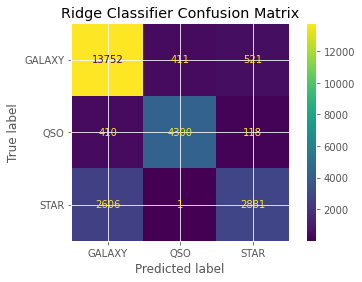

CPU times: user 147 ms, sys: 86.8 ms, total: 234 ms
Wall time: 138 ms


In [38]:
%%time

y_pred = ridge_classifier.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), 
    display_labels=labels
).plot()
plt.title("Ridge Classifier Confusion Matrix")
plt.show()

In [40]:
%%time

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=labels))
print()


Classification Report
              precision    recall  f1-score   support

      GALAXY       0.82      0.94      0.87     14684
         QSO       0.91      0.89      0.90      4828
        STAR       0.82      0.52      0.64      5488

    accuracy                           0.84     25000
   macro avg       0.85      0.78      0.81     25000
weighted avg       0.84      0.84      0.83     25000


CPU times: user 328 ms, sys: 989 µs, total: 329 ms
Wall time: 328 ms


In [41]:
%%time

print("Cross Validation Score")
for idx, score in enumerate(cross_val_score(
    ridge_classifier, 
    X, y, n_jobs=-1
), 1):
    print(f"        Split {idx} = {score}")
print()

Cross Validation Score
        Split 1 = 0.8328
        Split 2 = 0.83135
        Split 3 = 0.83325
        Split 4 = 0.84225
        Split 5 = 0.8283

CPU times: user 112 ms, sys: 57.8 ms, total: 170 ms
Wall time: 1.12 s


Compared to the others, Ridge Classification struggled with differentiating stars from galaxies. This issue comes from both uneven datasets and similar values between the types. Nonetheless, the other classifiers were able to differentiate far better.

## Conclusion

From comparing these models, we can see that Random Forests easily classified the best. I attribute this to how the algorithm works. By deciding rules, it allows for better separation and classification. Compare this to something like K-Nearest Neighbors, which builds off the location between points, that is there is no nesting. This means that semi-related objects can be wrongly classified far easier than others. Lastly, in the case of Ridge Regression Classification, the same issue of K-Nearest Neighbors comes into play: Nesting. Overall, I think the ability to nest the decisions allows for the Random Forest Classifier to excel.

This lines up well with my knowledge of the models, as Random Forests are incredibly common, and used extensively in Data Science.

## References
Art, P. (2016, August 10). Milky Way Galaxy Wallpapers HD. PixelsTalk.Net. https://www.pixelstalk.net/milky-way-galaxy-wallpapers-hd/

Epoch J2000.0. (n.d.). Retrieved April 19, 2022, from http://astro.vaporia.com/start/j20000epoch.html

Galaxy. (n.d.). Encyclopedia Brittanica. Retrieved April 19, 2022, from https://www.britannica.com/science/galaxy

Light-year. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Light-year&oldid=1084202989

Locke, D. (2016). M31, The Andromeda Galaxy Picture. https://www.dl-digital.com/astrophoto/M31_New.htm

Photometric system. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Photometric_system&oldid=1081982703

The Optical Spectra Catalogs | SDSS. (n.d.). Retrieved April 24, 2022, from https://www.sdss.org/dr17/spectro/catalogs/
